In [1]:
#NYC stop and frisk mapped 

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import geopandas as geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import box
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import adjustText as aT
import missingno as msn #helps with missing data in geo data sets 
import seaborn as sns
import json 
import geoplot as gplt

In [3]:
StopAndFriskdf = pd.read_csv("/Users/jordan/Documents/GitHub/2018NycStopAndFrisk/2018_sqf_database.csv")

#A snapshot of the data.
StopAndFriskdf.head(3)

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/18,19:04:00,2018,January,Monday,Based on C/W on Scene,APP,POM,1,...,G,(null),VARICK STREET && FRANKLIN STREET,(null),VARICK STREET,982327,201274,(null),PBMS,MANHATTAN
1,2,1/1/18,23:00:00,2018,January,Monday,Based on Radio Run,APP,POM,34,...,C,(null),DYCKMAN STREET && POST AVENUE,(null),DYCKMAN STREET,1004892,253548,(null),PBMN,MANHATTAN
2,3,1/1/18,23:55:00,2018,January,Monday,Based on Radio Run,APP,POM,808,...,B,4M,2245 RANDALL AVENUE,(null),RANDALL AVENUE,1026706,237776,(null),PBBX,BRONX


In [4]:
country = geopandas.read_file("/Users/jordan/Documents/GitHub/geospatial_learning/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [5]:
#Check the type of data that is contained in this dataframe
type(country)

geopandas.geodataframe.GeoDataFrame

In [6]:
#Check the data type of 
type(country.geometry)

geopandas.geoseries.GeoSeries

In [7]:
type(country.geometry[0])


shapely.geometry.multipolygon.MultiPolygon

<AxesSubplot:>

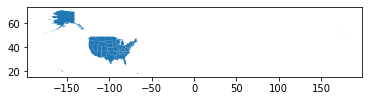

In [8]:
country.plot()


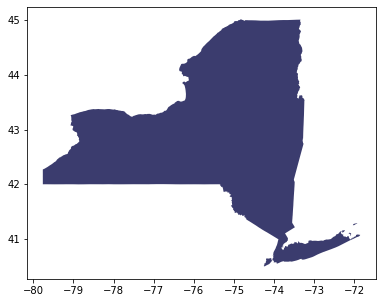

In [9]:
country[country['NAME'].isin(['New York'])].plot(figsize=(10,5), color='#3B3C6E');

In [10]:
#counties = geopandas.read_file("/Users/jordan/Documents/GitHub/geospatial_learning/gz_2010_us_050_00_500k.json")


In [11]:
nyc_streets = geopandas.read_file("/Users/jordan/Documents/GitHub/geospatial_learning/nyc-streets.geojson.txt")


In [12]:
nyc_streets.head()

,STATEFP,COUNTYFP,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,36,005,110391528508,Longwood Ave,M,S1400,"MULTILINESTRING ((-73.90002 40.81860, -73.8998..."
1,36,005,110391524085,E 149th St,M,S1400,"LINESTRING (-73.91763 40.81605, -73.91677 40.8..."
2,36,005,110391528025,Timpson Pl,M,S1400,"LINESTRING (-73.90647 40.80956, -73.90625 40.8..."
3,36,005,110391523563,I- 278,I,S1100,"LINESTRING (-73.91863 40.79910, -73.91834 40.7..."
4,36,005,110391524522,Barry St,M,S1400,"LINESTRING (-73.89560 40.81168, -73.89539 40.8..."


In [13]:
StopAndFriskdf.describe()

,STOP_FRISK_ID,YEAR2,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_COMMAND_CODE,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES,STOP_LOCATION_PRECINCT,STOP_LOCATION_X,STOP_LOCATION_Y
count,11008.000000,11008.0,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,1.100800e+04,11008.000000
mean,5504.500000,2018.0,183.268350,184.168241,21.647075,11.583757,60.983739,1.004989e+06,207880.290425
std,3177.880216,0.0,268.829442,268.496744,989.025666,19.137491,32.838054,1.918311e+04,29819.550356
min,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.000000,9.148030e+05,122284.000000
25%,2752.750000,2018.0,43.000000,43.000000,1.000000,5.000000,34.000000,9.947050e+05,184335.000000
50%,5504.500000,2018.0,73.000000,75.000000,1.000000,8.000000,62.000000,1.003550e+06,207011.000000
75%,8256.250000,2018.0,113.000000,113.000000,2.000000,15.000000,83.000000,1.014981e+06,235551.000000
max,11008.000000,2018.0,879.000000,881.000000,99999.000000,999.000000,123.000000,1.065899e+06,271349.000000


In [14]:
#Find geocoordinates for police precincts 
#match number of stop and frisks for each police precinct 

In [15]:
#Geocoordinates for police precincts 
police_pre = geopandas.read_file("/Users/jordan/Documents/GitHub/2018NycStopAndFrisk/NYC_Police_Precincts.geojson")



In [16]:

police_pre.head()

,OBJECTID,Precinct,SHAPE_Length,SHAPE_Area,geometry
0,1,1,0.259319,0.000468,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,5,0.058732,0.000179,"MULTIPOLYGON (((-73.98864 40.72294, -73.98869 ..."
2,3,6,0.087053,0.000219,"MULTIPOLYGON (((-73.99969 40.73856, -73.99684 ..."
3,4,7,0.055191,0.000182,"MULTIPOLYGON (((-73.97346 40.71897, -73.97351 ..."
4,5,9,0.064562,0.000212,"MULTIPOLYGON (((-73.97161 40.72673, -73.97163 ..."


In [17]:
#check rename of column geometry - may not need - can delete 
police_pre = geopandas.GeoDataFrame(police_pre, geometry='geometry')


In [18]:
#Check datatype of police_pre
type(police_pre)

geopandas.geodataframe.GeoDataFrame

In [19]:
#Check the type of geometry column 
type(police_pre['geometry'])

geopandas.geoseries.GeoSeries

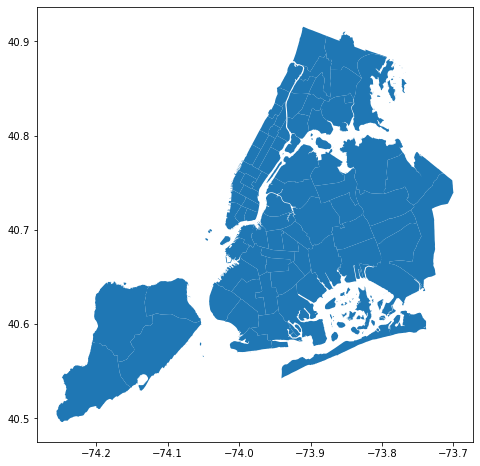

In [20]:
#plot the police precincts 
police_pre.plot(figsize=(12,8));


In [48]:
#Group by function for what precincts 

precinct_count = StopAndFriskdf.value_counts(subset=['STOP_LOCATION_PRECINCT']).rename_axis('Precinct').reset_index(name='counts')
print (precinct_count)

    Precinct  counts
0         75     432
1         43     396
2         23     347
3         40     311
4         67     289
..       ...     ...
72        68      50
73        50      45
74       123      36
75        17      31
76        22      24

[77 rows x 2 columns]


In [76]:
#Combine data based off precinct names 
fulldata = precinct_count.merge(police_pre, left_on=['Precinct'], right_on=['Precinct'])
fulldata.head(2)

,Precinct,counts,OBJECTID,SHAPE_Length,SHAPE_Area,geometry
0,75,432,47,0.328220,0.001785,"MULTIPOLYGON (((-73.85023 40.62333, -73.85024 ..."
1,43,396,26,0.196838,0.001124,"MULTIPOLYGON (((-73.85221 40.83636, -73.85207 ..."


In [77]:
fulldata = fulldata.drop(fulldata.columns[[2, 3, 4]], axis=1)

In [78]:
fulldata.head()

,Precinct,counts,geometry
0,75,432,"MULTIPOLYGON (((-73.85023 40.62333, -73.85024 ..."
1,43,396,"MULTIPOLYGON (((-73.85221 40.83636, -73.85207 ..."
2,23,347,"MULTIPOLYGON (((-73.93519 40.79148, -73.93547 ..."
3,40,311,"MULTIPOLYGON (((-73.90210 40.80482, -73.90210 ..."
4,67,289,"MULTIPOLYGON (((-73.90755 40.65119, -73.90849 ..."


In [65]:
# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['counts'], k=10)

In [66]:
gdf = geopandas.GeoDataFrame(fullData, crs="EPSG:4326")
